In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("f1_dnf.csv")
df.head()

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


In [3]:
df.shape

(10000, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     8982 non-null   object 
 9   fastestLap       10000 non-null  object 
 10  rank             10000 non-null  object 
 11  fastestLapTime   10000 non-null  object 
 12  fastestLapSpeed  9047 non-null   object 
 13  driverRef        10000 non-null  object 
 14  surname          10000 non-null  object 
 15  forename         10000 non-null  object 
 16  dob              10000 non-null  object 
 17  nationality_x

In [5]:
df.describe()

,resultId,raceId,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,23.972500,34.013439,5.067721,281.465900,0.289500
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,19.233599,25.167968,57.938131,414.586363,0.453553
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-37.849700,-118.189000,-7.000000,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,9.000000,34.843100,-2.940560,18.000000,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,18.000000,43.734700,5.971390,153.000000,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,34.000000,49.254200,14.764700,401.000000,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,80.000000,57.265300,144.968000,2227.000000,1.000000


In [6]:
df.isnull().sum()

resultId              0
raceId                0
year                  0
round                 0
grid                  0
positionOrder         0
points              971
laps                978
milliseconds       1018
fastestLap            0
rank                  0
fastestLapTime        0
fastestLapSpeed     953
driverRef             0
surname               0
forename              0
dob                   0
nationality_x         0
constructorRef        0
name                  0
nationality_y         0
circuitRef            0
circuitId             0
name_y                0
location              0
country               0
lat                   0
lng                   0
alt                   0
date                  0
target_finish         0
dtype: int64

In [7]:
drop_columns = ['resultId','raceId','driverRef', 'constructorRef', 'circuitRef', 'circuitId','dob','date','milliseconds', 'fastestLap','rank','fastestLapTime',
    'fastestLapSpeed', 'lat', 'lng','alt','location']

In [8]:
df=df.drop(columns=drop_columns)

In [9]:
df.head()

,year,round,grid,positionOrder,points,laps,surname,forename,nationality_x,name,nationality_y,name_y,country,target_finish
0,2002,13,11,4,3.0,77.0,Räikkönen,Kimi,Finnish,Hungaroring,British,McLaren,Hungary,1
1,1981,1,23,21,0.0,16.0,Watson,John,British,Long Beach,British,McLaren,USA,0
2,1958,8,0,26,0.0,0.0,Ruttman,Troy,American,Nürburgring,Italian,Maserati,Germany,0
3,2021,8,19,16,0.0,69.0,Schumacher,Mick,German,Red Bull Ring,American,Haas F1 Team,Austria,0
4,1988,12,0,30,0.0,0.0,Modena,Stefano,Italian,Autodromo Nazionale di Monza,Italian,Euro Brun,Italy,0


In [10]:
df.shape

(10000, 14)

In [11]:
df['driver']=df['forename']+" "+df['surname']

In [12]:
df.head()

,year,round,grid,positionOrder,points,laps,surname,forename,nationality_x,name,nationality_y,name_y,country,target_finish,driver
0,2002,13,11,4,3.0,77.0,Räikkönen,Kimi,Finnish,Hungaroring,British,McLaren,Hungary,1,Kimi Räikkönen
1,1981,1,23,21,0.0,16.0,Watson,John,British,Long Beach,British,McLaren,USA,0,John Watson
2,1958,8,0,26,0.0,0.0,Ruttman,Troy,American,Nürburgring,Italian,Maserati,Germany,0,Troy Ruttman
3,2021,8,19,16,0.0,69.0,Schumacher,Mick,German,Red Bull Ring,American,Haas F1 Team,Austria,0,Mick Schumacher
4,1988,12,0,30,0.0,0.0,Modena,Stefano,Italian,Autodromo Nazionale di Monza,Italian,Euro Brun,Italy,0,Stefano Modena


In [13]:
df=df.drop(columns=['forename','surname'])

In [14]:
df.head()

,year,round,grid,positionOrder,points,laps,nationality_x,name,nationality_y,name_y,country,target_finish,driver
0,2002,13,11,4,3.0,77.0,Finnish,Hungaroring,British,McLaren,Hungary,1,Kimi Räikkönen
1,1981,1,23,21,0.0,16.0,British,Long Beach,British,McLaren,USA,0,John Watson
2,1958,8,0,26,0.0,0.0,American,Nürburgring,Italian,Maserati,Germany,0,Troy Ruttman
3,2021,8,19,16,0.0,69.0,German,Red Bull Ring,American,Haas F1 Team,Austria,0,Mick Schumacher
4,1988,12,0,30,0.0,0.0,Italian,Autodromo Nazionale di Monza,Italian,Euro Brun,Italy,0,Stefano Modena


In [15]:
# renaming columns for better understanding
df.rename(columns={
    'nationality_x': 'driver_nationality',
    'nationality_y': 'constructor_nationality',
    'name_y': 'constructor_name',
    'name': 'circuit_name',
    'positionOrder': 'final_position'
}, inplace=True)

In [16]:
df.head()

,year,round,grid,final_position,points,laps,driver_nationality,circuit_name,constructor_nationality,constructor_name,country,target_finish,driver
0,2002,13,11,4,3.0,77.0,Finnish,Hungaroring,British,McLaren,Hungary,1,Kimi Räikkönen
1,1981,1,23,21,0.0,16.0,British,Long Beach,British,McLaren,USA,0,John Watson
2,1958,8,0,26,0.0,0.0,American,Nürburgring,Italian,Maserati,Germany,0,Troy Ruttman
3,2021,8,19,16,0.0,69.0,German,Red Bull Ring,American,Haas F1 Team,Austria,0,Mick Schumacher
4,1988,12,0,30,0.0,0.0,Italian,Autodromo Nazionale di Monza,Italian,Euro Brun,Italy,0,Stefano Modena


In [17]:
df.isnull().sum()

year                         0
round                        0
grid                         0
final_position               0
points                     971
laps                       978
driver_nationality           0
circuit_name                 0
constructor_nationality      0
constructor_name             0
country                      0
target_finish                0
driver                       0
dtype: int64

In [18]:
df.shape

(10000, 13)

In [19]:
# Replace missing 'points' with 0 (no points scored)
df['points'].fillna(0, inplace=True)

# Replace missing 'laps' with 0 (driver did not complete any laps)
df['laps'].fillna(0, inplace=True)

C:\Users\Hetanshi\AppData\Local\Temp\ipykernel_26616\4260069239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['points'].fillna(0, inplace=True)
C:\Users\Hetanshi\AppData\Local\Temp\ipykernel_26616\4260069239.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [20]:
df.isnull().sum()

year                       0
round                      0
grid                       0
final_position             0
points                     0
laps                       0
driver_nationality         0
circuit_name               0
constructor_nationality    0
constructor_name           0
country                    0
target_finish              0
driver                     0
dtype: int64

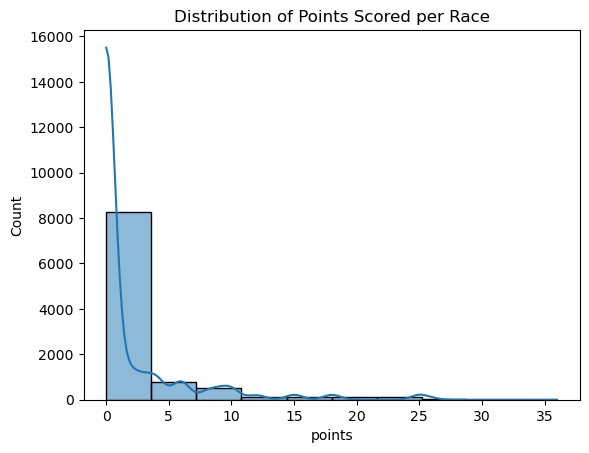

In [21]:
sns.histplot(df['points'], bins=10, kde=True)
plt.title("Distribution of Points Scored per Race")
plt.show()


In [22]:
##Observation
##this shows that the graph is right skewed

C:\Users\Hetanshi\AppData\Local\Temp\ipykernel_26616\218810838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target_finish', palette='coolwarm')


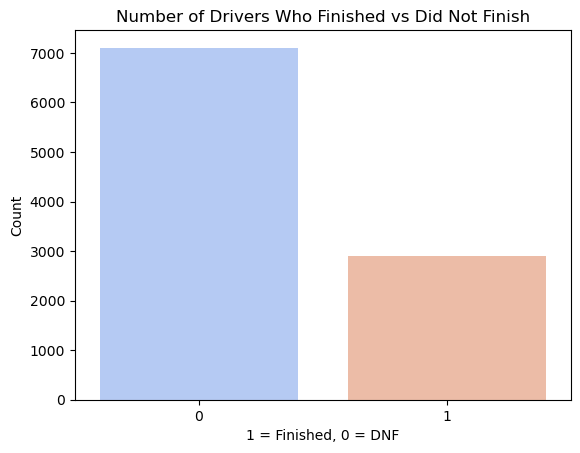

In [23]:
sns.countplot(data=df, x='target_finish', palette='coolwarm')
plt.title("Number of Drivers Who Finished vs Did Not Finish")
plt.xlabel("1 = Finished, 0 = DNF")
plt.ylabel("Count")
plt.show()


In [24]:
##Observation
##this above diagram shows class imbalance 

C:\Users\Hetanshi\AppData\Local\Temp\ipykernel_26616\995802049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='constructor_name', y='points', estimator='mean', ci=None)


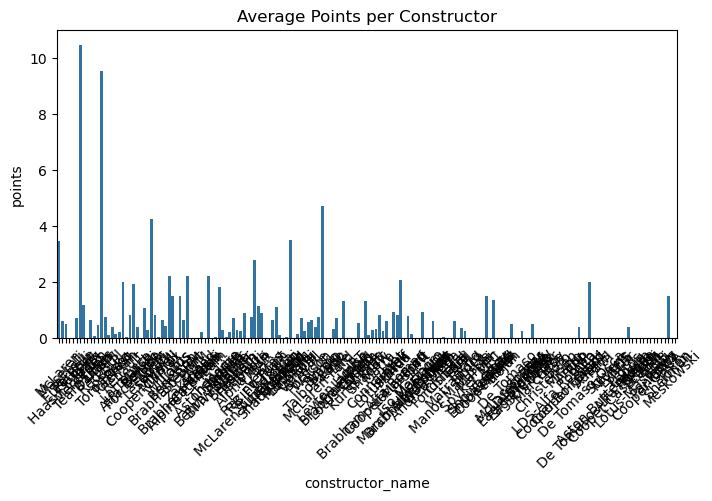

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='constructor_name', y='points', estimator='mean', ci=None)
plt.title("Average Points per Constructor")
plt.xticks(rotation=45)
plt.show()

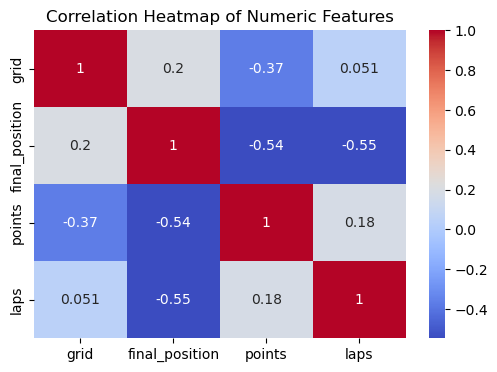

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['grid','final_position','points','laps']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [27]:
##Observation
##this shows that the relationships are not simple or perfectly linear.

C:\Users\Hetanshi\AppData\Local\Temp\ipykernel_26616\3772052033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drivers.index, y=top_drivers.values, palette='magma')


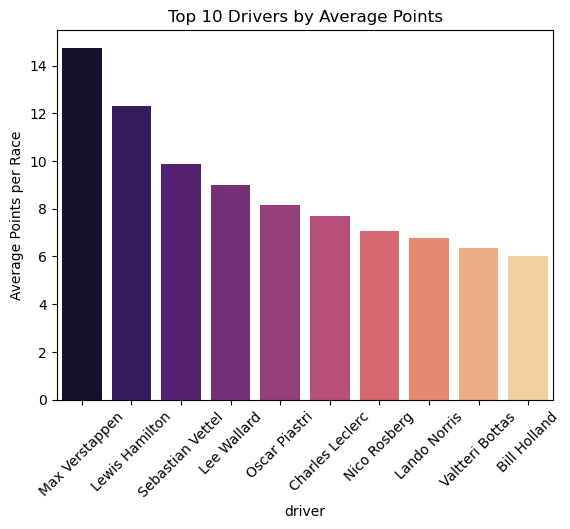

In [28]:
top_drivers = df.groupby('driver')['points'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_drivers.index, y=top_drivers.values, palette='magma')
plt.title("Top 10 Drivers by Average Points")
plt.ylabel("Average Points per Race")
plt.xticks(rotation=45)
plt.show()

In [29]:
df.head()

,year,round,grid,final_position,points,laps,driver_nationality,circuit_name,constructor_nationality,constructor_name,country,target_finish,driver
0,2002,13,11,4,3.0,77.0,Finnish,Hungaroring,British,McLaren,Hungary,1,Kimi Räikkönen
1,1981,1,23,21,0.0,16.0,British,Long Beach,British,McLaren,USA,0,John Watson
2,1958,8,0,26,0.0,0.0,American,Nürburgring,Italian,Maserati,Germany,0,Troy Ruttman
3,2021,8,19,16,0.0,69.0,German,Red Bull Ring,American,Haas F1 Team,Austria,0,Mick Schumacher
4,1988,12,0,30,0.0,0.0,Italian,Autodromo Nazionale di Monza,Italian,Euro Brun,Italy,0,Stefano Modena


In [30]:
categorical_columns=['driver_nationality', 'circuit_name', 'constructor_nationality', 
 'constructor_name', 'country', 'driver']

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,year,round,grid,final_position,points,laps,driver_nationality,circuit_name,constructor_nationality,constructor_name,country,target_finish,driver
0,2002,13,11,4,3.0,77.0,15,38,4,108,11,1,382
1,1981,1,23,21,0.0,16.0,8,48,4,108,33,0,343
2,1958,8,0,26,0.0,0.0,0,56,13,105,10,0,650
3,2021,8,19,16,0.0,69.0,17,61,0,68,2,0,446
4,1988,12,0,30,0.0,0.0,22,7,13,56,13,0,611


In [33]:
df.head(30)

,year,round,grid,final_position,points,laps,driver_nationality,circuit_name,constructor_nationality,constructor_name,country,target_finish,driver
0,2002,13,11,4,3.0,77.0,15,38,4,108,11,1,382
1,1981,1,23,21,0.0,16.0,8,48,4,108,33,0,343
2,1958,8,0,26,0.0,0.0,0,56,13,105,10,0,650
3,2021,8,19,16,0.0,69.0,17,61,0,68,2,0,446
4,1988,12,0,30,0.0,0.0,22,7,13,56,13,0,611
5,2019,6,5,14,0.0,77.0,13,25,0,68,18,0,381
6,1975,14,5,18,0.0,9.0,0,73,0,124,33,0,423
7,2013,12,16,13,0.0,53.0,26,7,20,137,13,1,178
8,2015,7,1,1,25.0,70.0,8,20,9,112,7,1,397
9,1960,1,2,6,1.0,79.0,8,12,4,156,0,0,273


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [35]:
X = df.drop(columns=['target_finish'])
y = df['target_finish']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [38]:
y_pred = model.predict(X_test)

In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
Precision: 0.89
Recall: 0.84
F1-Score: 0.86

Confusion Matrix:
[[1382   60]
 [  90  468]]


In [40]:
import joblib
joblib.dump(model, 'F1 Racing.joblib')
print("Model successfully saved as 'F1 Racing.joblib'")

Model successfully saved as 'F1 Racing.joblib'


In [41]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- STEP 1: LOAD AND PREPROCESS DATA (Typically done in a separate script) ---

@st.cache_data
def load_and_preprocess_data():
    """Loads the dataset and performs all necessary preprocessing steps."""
    try:
        df = pd.read_csv('your_dataset.csv')
    except FileNotFoundError:
        st.error("Error: 'your_dataset.csv' not found. Please place the file in the same directory.")
        return None, None, None

    # Define features and target
    # The columns must exactly match those used for training
    features = ['year', 'round', 'grid', 'laps', 'driver', 'constructor_name', 'circuit_name']
    target = 'target_finish'

    X = df[features]
    y = df[target]

    # Identify categorical and numerical features
    categorical_features = ['driver', 'constructor_name', 'circuit_name']
    numerical_features = ['year', 'round', 'grid', 'laps']

    # Create a preprocessor using ColumnTransformer for one-hot encoding
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep the numerical features
    )
    
    # Fit the preprocessor to the data
    preprocessor.fit(X)

    return X, y, preprocessor

# --- STEP 2: TRAIN AND SAVE THE MODEL (Also typically done separately) ---

@st.cache_resource
def train_and_save_model(X, y, preprocessor):
    """Trains the RandomForestClassifier and saves the model and preprocessor."""
    if X is None or y is None:
        return None, None

    # Apply preprocessing to the entire dataset
    X_processed = preprocessor.transform(X)

    # Split data for training (optional in this unified script but good practice)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    # Save the model and the preprocessor
    joblib.dump(model, 'F1_Racing.joblib')
    joblib.dump(preprocessor, 'F1_Racing_preprocessor.joblib')

    st.success("Model and preprocessor successfully trained and saved!")
    return model, preprocessor

# --- STEP 3: STREAMLIT APP LOGIC ---

# Define the function to get user input from the sidebar
def get_user_input():
    with st.sidebar:
        st.header("Race and Driver Inputs")
        year = st.number_input("Year", min_value=1950, max_value=2024, value=2024)
        grid = st.number_input("Starting Grid Position", min_value=1, max_value=22, value=1)
        round_val = st.number_input("Race Round", min_value=1, max_value=24, value=1)
        laps = st.number_input("Laps", min_value=10, max_value=100, value=60)
        
        # NOTE: For real app, populate these lists from your dataset
        driver_list = ['Lewis Hamilton', 'Max Verstappen'] 
        constructor_list = ['Mercedes', 'Red Bull Racing']
        circuit_list = ['Bahrain Grand Prix', 'Monaco Grand Prix']
        
        driver = st.selectbox("Driver", driver_list)
        constructor_name = st.selectbox("Constructor", constructor_list)
        circuit_name = st.selectbox("Circuit", circuit_list)
        
    # Create a DataFrame from user input
    user_data = pd.DataFrame({
        'year': [year], 'round': [round_val], 'grid': [grid], 'laps': [laps],
        'driver': [driver], 'constructor_name': [constructor_name], 'circuit_name': [circuit_name]
    })
    return user_data

def main():
    """Main function to run the Streamlit app."""
    st.title("🏎️ Formula 1 Race Outcome Predictor")
    st.write("Enter the race and driver details to predict the outcome (target_finish).")

    # Load data and preprocessor
    X, y, preprocessor = load_and_preprocess_data()
    
    # Train and save model (will only run once due to @st.cache_resource)
    model, preprocessor = train_and_save_model(X, y, preprocessor)
    
    if model and preprocessor:
        # Get user input
        user_input_df = get_user_input()

        # Place the prediction logic in a button click
        if st.button("Predict Outcome"):
            try:
                # Preprocess user input using the saved preprocessor
                preprocessed_input = preprocessor.transform(user_input_df)

                # Make prediction
                prediction = model.predict(preprocessed_input)

                # Display the result
                st.success(f"The predicted outcome is: {prediction[0]}")
            except Exception as e:
                st.error(f"An error occurred during prediction: {e}")

if __name__ == "__main__":
    main()

2025-10-15 18:43:08.385 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-15 18:43:08.390 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.311 
  command:

    streamlit run C:\Users\Hetanshi\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-15 18:43:09.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.323 No runtime found, using MemoryCacheStorageManager
2025-10-15 18:43:09.325 Thread 'MainThread': missing ScriptRunContext! This war

In [42]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# A single function to load both the pre-trained model and the preprocessor
@st.cache_resource
def load_resources():
    """Loads the pre-trained model and preprocessor from disk."""
    try:
        model = joblib.load('F1_Racing.joblib')
        preprocessor = joblib.load('F1_Racing_preprocessor.joblib')
        return model, preprocessor
    except FileNotFoundError:
        st.error("Error: Required model files ('F1_Racing.joblib', 'F1_Racing_preprocessor.joblib') not found. Please ensure they are in the same directory.")
        return None, None

# This is the function you should have in your main app.py
def get_user_input():
    """Collects user inputs from Streamlit widgets and returns a DataFrame."""
    with st.sidebar:
        st.header("Race and Driver Inputs")
        year = st.number_input("Year", min_value=1950, max_value=2024, value=2024)
        grid = st.number_input("Starting Grid Position", min_value=1, max_value=22, value=1)
        race_round = st.number_input("Race Round", min_value=1, max_value=24, value=1)
        laps = st.number_input("Laps", min_value=10, max_value=100, value=60)
        
        # NOTE: You must populate these lists with ALL unique values from your dataset
        # This is where you would load the unique values from your data source
        driver_list = ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc'] 
        constructor_list = ['Mercedes', 'Red Bull Racing', 'Ferrari']
        circuit_list = ['Bahrain Grand Prix', 'Monaco Grand Prix', 'Silverstone']
        
        driver = st.selectbox("Driver", driver_list)
        constructor_name = st.selectbox("Constructor", constructor_list)
        circuit_name = st.selectbox("Circuit", circuit_list)
        
    user_data = {
        'year': [year],
        'round': [race_round],
        'grid': [grid],
        'laps': [laps],
        'driver': [driver],
        'constructor_name': [constructor_name],
        'circuit_name': [circuit_name]
    }
    
    return pd.DataFrame(user_data)

# --- Main App Logic ---

def main():
    st.title("🏎️ F1 Race Outcome Predictor")
    
    # Load the model and preprocessor
    model, preprocessor = load_resources()
    
    if model and preprocessor:
        # Get the user's input
        user_input_df = get_user_input()

        # Create a button for prediction
        if st.button("Predict Outcome"):
            try:
                # Use the pre-fitted preprocessor to transform the user input
                # This handles both numerical scaling and one-hot encoding in one go
                transformed_input = preprocessor.transform(user_input_df)

                # Make the prediction
                prediction = model.predict(transformed_input)

                # Display the prediction to the user
                st.success(f"The predicted outcome is: {prediction[0]}")
            
            except Exception as e:
                st.error(f"An error occurred during prediction: {e}")

if __name__ == "__main__":
    main()

2025-10-15 18:43:09.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [43]:
# Assuming you've already loaded the model and preprocessor
model, preprocessor = load_resources()

# Get the user's input from the sidebar
user_input_df = get_user_input()

if st.button("Predict Outcome"):
    # Step 1: Preprocess the user's raw input using the loaded preprocessor
    # This is the crucial step that creates the 'transformed_input' variable
    transformed_input = preprocessor.transform(user_input_df)

    # Step 2: Make the prediction using the transformed input
    prediction = model.predict(transformed_input)

    # Step 3: Display the result
    st.write("Predicted Outcome:")
    st.write(prediction[0])
    

2025-10-15 18:43:09.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:09.518 Session state does not function when running a script without `streamlit run`
2025-10-15 18:43:09.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43

In [44]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# --- Load Model and Preprocessor ---
@st.cache_resource
def load_resources():
    """Loads the pre-trained model and preprocessor from disk."""
    try:
        model = joblib.load('F1_Racing.joblib')
        preprocessor = joblib.load('F1_Racing_preprocessor.joblib')
        return model, preprocessor
    except FileNotFoundError:
        st.error("Error: Required model files ('F1_Racing.joblib', 'F1_Racing_preprocessor.joblib') not found. Please ensure they are in the same directory.")
        return None, None

# --- Get User Input ---
def get_user_input():
    """Collects user inputs from Streamlit widgets and returns a DataFrame."""
    with st.sidebar:
        st.header("Race and Driver Inputs")
        year = st.number_input("Year", min_value=1950, max_value=2024, value=2024)
        grid = st.number_input("Starting Grid Position", min_value=1, max_value=22, value=1)
        race_round = st.number_input("Race Round", min_value=1, max_value=24, value=1)
        laps = st.number_input("Laps", min_value=10, max_value=100, value=60)

        # NOTE: You must populate these lists with ALL unique values from your dataset
        driver_list = ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc', 'Lando Norris']
        constructor_list = ['Mercedes', 'Red Bull Racing', 'Ferrari', 'McLaren']
        circuit_list = ['Bahrain Grand Prix', 'Monaco Grand Prix', 'Silverstone']
        
        driver = st.selectbox("Driver", driver_list)
        constructor_name = st.selectbox("Constructor", constructor_list)
        circuit_name = st.selectbox("Circuit", circuit_list)
        
    user_data = {
        'year': [year],
        'round': [race_round],
        'grid': [grid],
        'laps': [laps],
        'driver': [driver],
        'constructor_name': [constructor_name],
        'circuit_name': [circuit_name]
    }
    
    return pd.DataFrame(user_data)

# --- Feature Importance Plotting Function ---
def plot_feature_importance(model, preprocessor):
    """Creates a Plotly bar chart of feature importances."""
    # Get the names of the one-hot encoded features from the preprocessor
    ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out()

    # Get the names of the numerical features
    numerical_feature_names = preprocessor.feature_names_in_[preprocessor.transformers_[0][2].__len__():]

    # Combine all feature names in the correct order
    all_feature_names = np.concatenate([ohe_feature_names, numerical_feature_names])

    # Get the feature importances from the fitted RandomForestClassifier
    feature_importances = model.feature_importances_

    # Create a DataFrame for easy sorting and plotting
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': feature_importances
    })

    # Sort the DataFrame by importance score in ascending order for a horizontal bar chart
    fi_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

    # Create an interactive horizontal bar chart with Plotly
    fig = px.bar(
        fi_sorted,
        x='Importance',
        y='Feature',
        orientation='h',
        title="Feature Importance",
        labels={
            "Importance": "Feature Importance Score",
            "Feature": "Variable"
        },
        template="plotly_white",
        height=800
    )

    # Customize the layout
    fig.update_layout(
        xaxis_title="Feature Importance Score",
        yaxis_title="Variable",
        xaxis_tickformat=".2f"
    )

    return fig

# --- Main Streamlit App Logic ---
def main():
    st.title("🏎️ Formula 1 Race Outcome Predictor")
    st.write("Enter the race and driver details to predict the outcome (target_finish).")

    # Load the model and preprocessor at the start
    model, preprocessor = load_resources()
    
    # Check if the resources were loaded successfully
    if model is not None and preprocessor is not None:
        # Get the user's input
        user_input_df = get_user_input()

        # Create a button to trigger the prediction
        if st.button("Predict Outcome"):
            try:
                # This is the step that was causing your NameError
                # It takes the raw user input and transforms it using the preprocessor
                transformed_input = preprocessor.transform(user_input_df)

                # Make the prediction using the transformed input
                prediction = model.predict(transformed_input)

                # Display the prediction to the user
                st.success(f"The predicted outcome is: {prediction[0]}")
            
            except Exception as e:
                st.error(f"An error occurred during prediction: {e}")
        
        # Display the feature importance graph in the main section of the app
        st.subheader("Model Insights: Feature Importance")
        fig = plot_feature_importance(model, preprocessor)
        st.plotly_chart(fig, use_container_width=True)
        
    else:
        st.info("Model files are not available. Please ensure 'F1_Racing.joblib' and 'F1_Racing_preprocessor.joblib' are in the directory.")

if __name__ == "__main__":
    main()

2025-10-15 18:43:10.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:10.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:10.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:10.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:10.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:43:10.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [45]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# --- Page Configuration ---
st.set_page_config(layout="wide", page_title="F1 Race Predictor")

# --- Load Model and Preprocessor (Cached for Efficiency) ---
@st.cache_resource
def load_resources():
    """Loads the pre-trained model and preprocessor from disk."""
    try:
        # Load the trained model and the ColumnTransformer (preprocessor)
        model = joblib.load('F1_Racing.joblib')
        preprocessor = joblib.load('F1_Racing_preprocessor.joblib')
        return model, preprocessor
    except FileNotFoundError:
        st.error("Error: Required model files ('F1_Racing.joblib', 'F1_Racing_preprocessor.joblib') not found. Please ensure they are in the same directory.")
        return None, None

# --- Get User Input ---
def get_user_input():
    """Collects user inputs from Streamlit widgets and returns a DataFrame."""
    
    # Define lists for categorical inputs (MUST match all categories seen during training)
    # NOTE: In a real-world app, you would dynamically load these lists from your training data.
    driver_list = ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc', 'Lando Norris', 'Carlos Sainz', 'Sergio Perez']
    constructor_list = ['Mercedes', 'Red Bull Racing', 'Ferrari', 'McLaren', 'Aston Martin']
    circuit_list = ['Bahrain Grand Prix', 'Monaco Grand Prix', 'Silverstone', 'Spa-Francorchamps', 'Monza']
    
    with st.sidebar:
        st.header("🏁 Race & Driver Inputs")
        
        # Numerical inputs
        year = st.number_input("Year", min_value=1950, max_value=2024, value=2024, step=1)
        grid = st.number_input("Starting Grid Position", min_value=1, max_value=22, value=1, step=1)
        race_round = st.number_input("Race Round", min_value=1, max_value=24, value=1, step=1)
        laps = st.number_input("Laps", min_value=10, max_value=100, value=60, step=1)
        
        # Categorical inputs
        driver = st.selectbox("Driver", driver_list)
        constructor_name = st.selectbox("Constructor", constructor_list)
        circuit_name = st.selectbox("Circuit", circuit_list)
        
    user_data = {
        'year': [year],
        'round': [race_round],
        'grid': [grid],
        'laps': [laps],
        'driver': [driver],
        'constructor_name': [constructor_name],
        'circuit_name': [circuit_name]
    }
    
    return pd.DataFrame(user_data)

# --- Feature Importance Plotting Function ---
def plot_feature_importance(model, preprocessor):
    """Creates a Plotly bar chart of feature importances."""
    
    # 1. Get the names of the encoded and numerical features
    # This logic is necessary because ColumnTransformer outputs a flat array
    try:
        # Check if the transformer is a standard OneHotEncoder
        ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out()
    except AttributeError:
        # Fallback if the transformer is inside a pipeline or has a non-standard structure
        ohe_feature_names = preprocessor.get_feature_names_out(input_features=None)
    
    # Identify numerical features (assuming they are passed through after OHE)
    num_features_end_index = model.feature_importances_.size - (len(preprocessor.feature_names_in_) - len(preprocessor.transformers_[0][2]))
    numerical_feature_names = preprocessor.feature_names_in_[num_features_end_index:]
    
    # Combine all feature names in the correct order
    all_feature_names = np.concatenate([ohe_feature_names, numerical_feature_names])

    # 2. Get the feature importances and create DataFrame
    feature_importances = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': feature_importances
    })

    # Sort the DataFrame by importance score in ascending order for a horizontal bar chart
    fi_sorted = feature_importance_df.sort_values(by='Importance', ascending=False).head(20).sort_values(by='Importance', ascending=True)

    # 3. Create interactive horizontal bar chart with Plotly
    fig = px.bar(
        fi_sorted,
        x='Importance',
        y='Feature',
        orientation='h',
        title="Top 20 Feature Importance (Mean Decrease Impurity)",
        labels={
            "Importance": "Feature Importance Score",
            "Feature": "Variable"
        },
        template="plotly_white",
        height=700
    )

    fig.update_layout(
        xaxis_title="Feature Importance Score",
        yaxis_title="Variable",
        xaxis_tickformat=".3f"
    )

    return fig

# --- Main App Execution ---
def main():
    # 1. Load Resources (Model and Preprocessor)
    model, preprocessor = load_resources()

    # 2. Page Layout and Title
    st.markdown("<h1 style='text-align: center;'>🏎️ F1 Race Prediction Dashboard</h1>", unsafe_allow_html=True)
    st.markdown("<h3 style='text-align: center;'>Predict Race Outcome & Analyze Model Drivers</h3>", unsafe_allow_html=True)

    # Check if the resources were loaded successfully
    if model is not None and preprocessor is not None:
        
        # Split the layout into two columns for prediction interface and features plot
        col1, col2 = st.columns([1, 2])
        
        # --- Column 1: Prediction Interface ---
        with col1:
            st.subheader("Predict Race Outcome")
            user_input_df = get_user_input()
            
            # Predict Button
            if st.button("Predict Final Position", use_container_width=True, type="primary"):
                with st.spinner("Calculating prediction..."):
                    try:
                        # Preprocess the user input
                        transformed_input = preprocessor.transform(user_input_df)

                        # Make the prediction
                        prediction = model.predict(transformed_input)
                        
                        # Display the result
                        st.subheader("Predicted Finish Position")
                        # Assuming target_finish is an integer rank
                        st.success(f"Position: **{int(prediction[0])}**")
                        
                    except Exception as e:
                        st.error(f"An error occurred during prediction. Check console for details: {e}")
                        
        # --- Column 2: Feature Importance Plot ---
        with col2:
            st.subheader("Model Insights")
            try:
                fig = plot_feature_importance(model, preprocessor)
                st.plotly_chart(fig, use_container_width=True)
            except Exception as e:
                st.warning(f"Could not generate Feature Importance Plot. Error: {e}")

    else:
        st.error("Cannot run app. Please ensure model and preprocessor files are available.")


if __name__ == "__main__":
    main()


2025-10-15 18:47:43.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 18:47:44.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar